In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import matplotlib
#matplotlib.use('GTKAgg')
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

In [3]:
df = pd.read_excel ('Data.xlsx')
                  

<ipython-input-3-deb572474427>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  df = pd.read_excel ('Data.xlsx')


In [9]:
df

,number of parameters,type of function,accuracy [max/mean],time [s],type_of_opt,assigned_class
0,2,Trig,0.805239,0.074336,Random,0
1,2,Trig,0.787891,0.050790,Random,0
2,2,Trig,0.790462,0.066809,Random,0
3,2,Trig,0.866317,0.053579,Random,0
4,2,Trig,0.844411,0.050650,Random,0
5,2,Trig,0.829250,0.045677,Random,0
6,2,Trig,0.832084,0.052770,Random,0
7,2,Trig,0.858530,0.049329,Random,0
8,2,Trig,0.814655,0.058481,Random,0
9,2,Trig,0.858295,0.046367,Random,0


In [5]:
print(len(df))
print(df.head())

30
   number of parameters type of function  accuracy [max/mean]  time [s]  \
0                     2             Trig             0.805239  0.074336   
1                     2             Trig             0.787891  0.050790   
2                     2             Trig             0.790462  0.066809   
3                     2             Trig             0.866317  0.053579   
4                     2             Trig             0.844411  0.050650   

  type_of_opt  assigned_class  
0      Random               0  
1      Random               0  
2      Random               0  
3      Random               0  
4      Random               0  


In [8]:
# replace zeroes
zero_not_accepted = ['number of parameters', 'type of function', 'accuracy [max/mean]', 'time [s]', 'type_of_opt']

for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    

In [31]:
# split dataset
# X = df.iloc[:,0:6]
# y = df.iloc[:,5:6]
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [28]:
X = df[['accuracy [max/mean]','time [s]']]
y = df['assigned_class']

print(len(y))

30


In [49]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14) #14 is seed

print(len(y_train), len(y_test))

24 6


In [50]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [52]:
K_neighbors = 1

In [51]:
#Define the model: Init K-NN
# We create an instance of Neighbours Classifier and fit it to the training data.
# if you set weights = 'distance' here you will have a weighted KNN classifier
clf = neighbors.KNeighborsClassifier(K_neighbors, weights='distance')

# Here we fit it to the data - it figures out the classes and 
# which training X points belong to each class in Y 
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [43]:
print(clf.classes_, clf.effective_metric_, clf.n_samples_fit_)

[0 1 2] euclidean 30


In [55]:
# Predict the test set results
y_test_predicted = clf.predict(X_test)
y_test_probabilities = clf.predict_proba(X_test)
mean_accuracy = clf.score(X_test, y_test)

print("predicted classes", y_test_predicted)
print("KNN probability of belonging to class",y_test_probabilities)
print("Mean accuracy of prediction", mean_accuracy)


predicted classes [2 0 0 0 2 0]
KNN probability of belonging to class [[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
Mean accuracy of prediction 0.5


In [45]:
X_train[:,0]

array([-1.66959331,  0.31666277,  0.57519774, -1.3532662 ,  0.64890474,
        0.16757952,  0.46550905,  0.54208235, -1.1879093 , -1.56086229,
        0.12922297, -1.74457692,  0.68450867,  0.83939896,  0.52431679,
        0.61790685,  1.01384948,  1.01680349, -1.22004846,  1.11465092,
        0.34719989, -1.77306413,  0.57611641,  0.92941002])

In [54]:
# Evaluate Model
cm = confusion_matrix(y_test, y_test_predicted)
print(cm)

[[1 0 2]
 [0 0 2]
 [0 0 1]]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

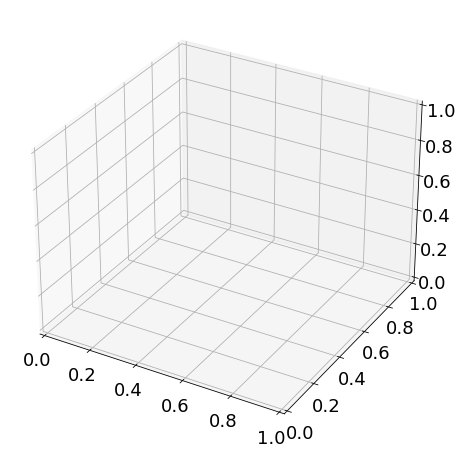

In [60]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['accuracy [max/mean]'],X_train['time [s]'],y_train)

In [ ]:
# classifier = KNeighborsClassifier(n_neighbors=1, p=2, metric='euclidean')

In [61]:
# Create color maps
